In [3]:
from OF_trigger import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from trace_IO import load_traces_from_zstd
import os

# --- Configuration ---
noise_colors = ['white', 'pink', 'brownian', 'blue', 'violet', 'from_MMC']
base_path = "/ceph/dwong/trigger_samples/noise_traces"
mmc_trace_path = "/ceph/dwong/trigger_samples/NR/traces_energy_0.zst"
sampling_frequency = 3.90625e6
template = np.load("../templates/template_K_alpha_no_baseline.npy")
trace_per_set = 54

# --- Data Containers ---
all_amplitudes = {}
all_chisq = {}

# --- Process Each Noise Type ---
for color in noise_colors:
    print(f"\n--- Processing {color} noise ---")

    # Set trace source and number of sets
    if color == "from_MMC":
        trace_path = mmc_trace_path
        n_sets = 100
    else:
        trace_path = f"{base_path}/{color}_noise_traces.zst"
        n_sets = 100

    # Load traces
    loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

    # Load corresponding PSD
    psd_path = f"../templates/noise_psd_{color}.npy"
    if not os.path.exists(psd_path):
        raise FileNotFoundError(f"Missing PSD file for {color} noise at: {psd_path}")
    noise_psd = np.load(psd_path)

    # Resample PSD if needed
    expected_len = len(template) // 2 + 1
    if len(noise_psd) != expected_len:
        freqs = np.fft.rfftfreq(len(template), d=1 / sampling_frequency)
        original_freq = np.linspace(freqs[0], freqs[-1], len(noise_psd))
        noise_psd = interp1d(original_freq, noise_psd, bounds_error=False, fill_value="extrapolate")(freqs)

    # Create Optimum Filter with corresponding PSD
    trigger = OFtrigger(template, noise_psd, sampling_frequency)

    # Fit traces
    amplitudes = []
    chisqs = []

    for i in range(n_sets):
        for trace in loaded_traces[i]:
            of_val, chisq = trigger.fit(trace)
            amplitudes.append(of_val)
            chisqs.append(chisq)

    all_amplitudes[color] = np.array(amplitudes)
    all_chisq[color] = np.array(chisqs)



--- Processing white noise ---

--- Processing pink noise ---

--- Processing brownian noise ---

--- Processing blue noise ---

--- Processing violet noise ---

--- Processing from_MMC noise ---


In [6]:
# Define plot colors for each noise type
plot_colors = {
    'white': 'black',
    'pink': 'magenta',
    'brownian': 'saddlebrown',
    'blue': 'blue',
    'violet': 'purple',
    'from_MMC': 'orange',
}


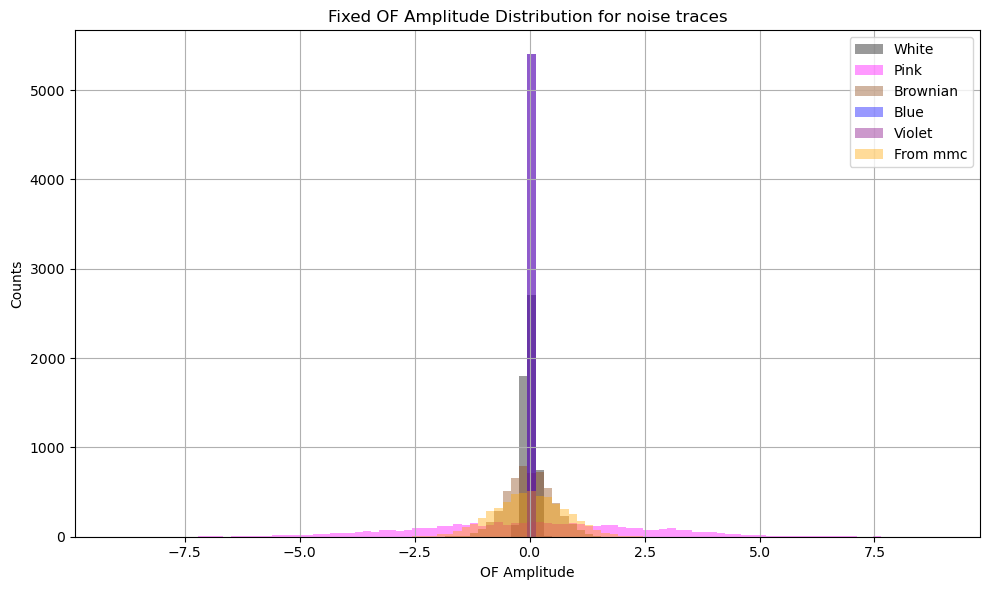

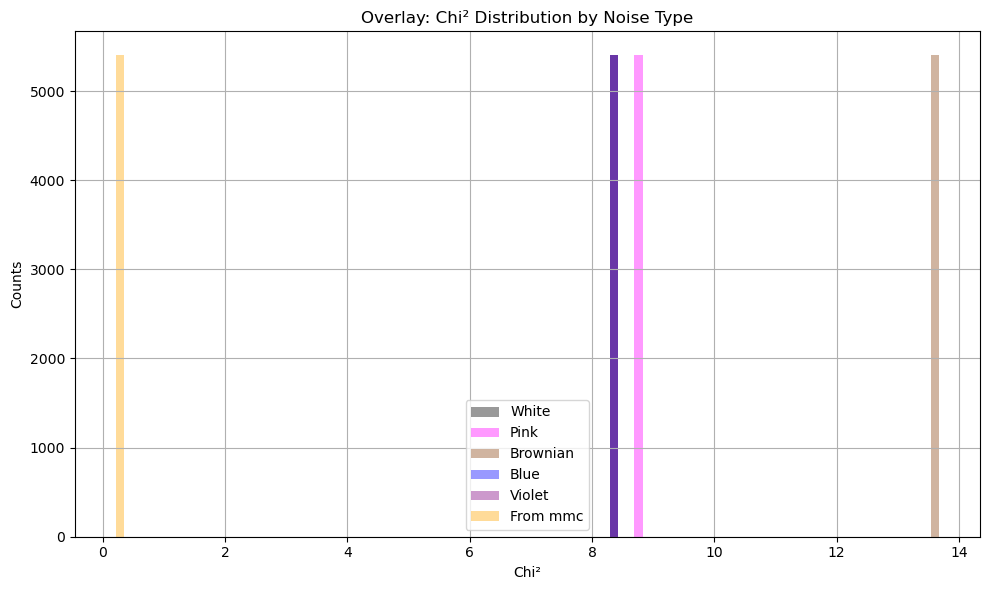

✅ Overlay plots (unnormalized) saved as PNG images with shared bins.


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- Overlay: OF Amplitudes with Shared Bins ---
# Compute shared bin edges from all amplitude data
all_amp_vals = np.concatenate(list(all_amplitudes.values()))
shared_amp_bins = np.histogram_bin_edges(all_amp_vals, bins=100)

plt.figure(figsize=(10, 6))
for color, data in all_amplitudes.items():
    plt.hist(data, bins=shared_amp_bins, alpha=0.4,
             label=color.replace("_", " ").capitalize(),
             color=plot_colors.get(color, 'gray'), edgecolor='none')
plt.title("Fixed OF Amplitude Distribution for noise traces")
plt.xlabel("OF Amplitude")
plt.ylabel("Counts")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Overlay: Chi² with Shared Bins ---
# Compute shared bin edges from all chi² data
all_chisq_vals = np.concatenate(list(all_chisq.values()))
shared_chisq_bins = np.histogram_bin_edges(all_chisq_vals, bins=100)

plt.figure(figsize=(10, 6))
for color, data in all_chisq.items():
    plt.hist(data, bins=shared_chisq_bins, alpha=0.4,
             label=color.replace("_", " ").capitalize(),
             color=plot_colors.get(color, 'gray'), edgecolor='none')
plt.title("Overlay: Chi² Distribution by Noise Type")
plt.xlabel("Chi²")
plt.ylabel("Counts")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("✅ Overlay plots (unnormalized) saved as PNG images with shared bins.")


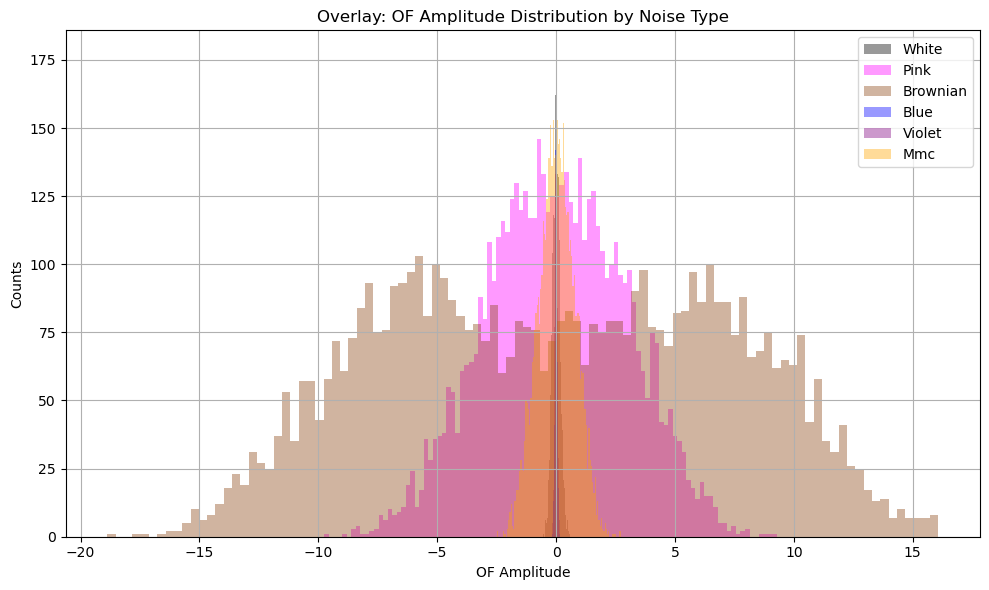

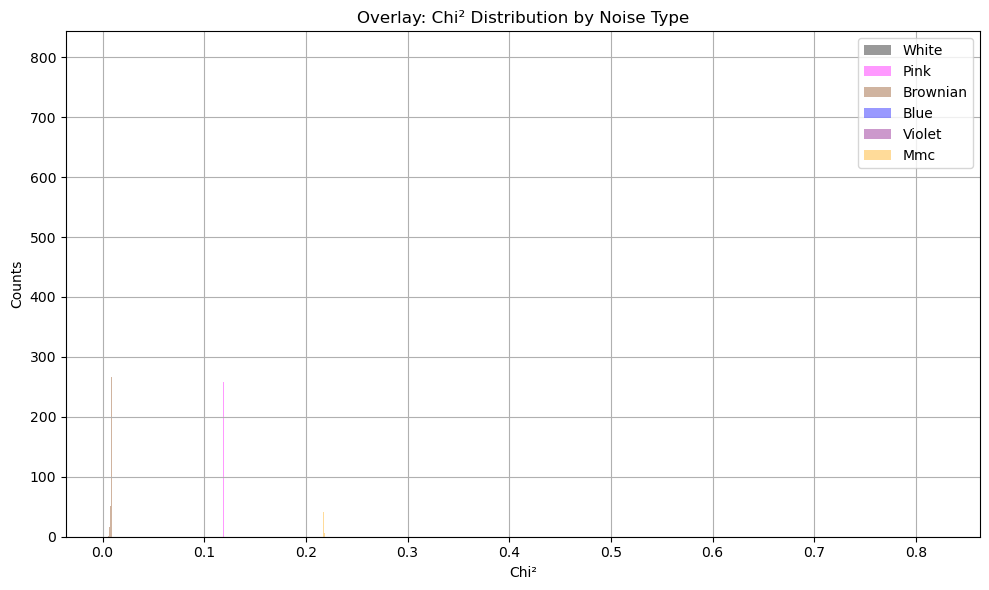

✅ Overlay plots (unnormalized) saved as PNG images.


In [33]:
# --- Overlay: OF Amplitudes ---
plt.figure(figsize=(10, 6))
for color, data in all_amplitudes.items():
    plt.hist(data, bins=100, alpha=0.4, label=color.capitalize(),
             color=plot_colors.get(color, 'gray'), edgecolor='none')  # removed density=True
plt.title("Overlay: OF Amplitude Distribution by Noise Type")
plt.xlabel("OF Amplitude")
plt.ylabel("Counts")  # changed from "Normalized Density"
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("overlay_of_amplitudes.png")
plt.show()

# --- Overlay: Chi² ---
plt.figure(figsize=(10, 6))
for color, data in all_chisq.items():
    plt.hist(data, bins=100, alpha=0.4, label=color.capitalize(),
             color=plot_colors.get(color, 'gray'), edgecolor='none')  # removed density=True
plt.title("Overlay: Chi² Distribution by Noise Type")
plt.xlabel("Chi²")
plt.ylabel("Counts")  # changed from "Normalized Density"
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("overlay_chisq.png")
plt.show()

print("✅ Overlay plots (unnormalized) saved as PNG images.")


In [34]:
path = "/ceph/dwong/trigger_samples/noise_traces/brownian_noise_traces.zst"
loaded_traces = load_traces_from_zstd(path, n_traces=n_sets)

In [35]:
loaded_traces.shape

(100, 54, 32768)

In [36]:
from tools import *

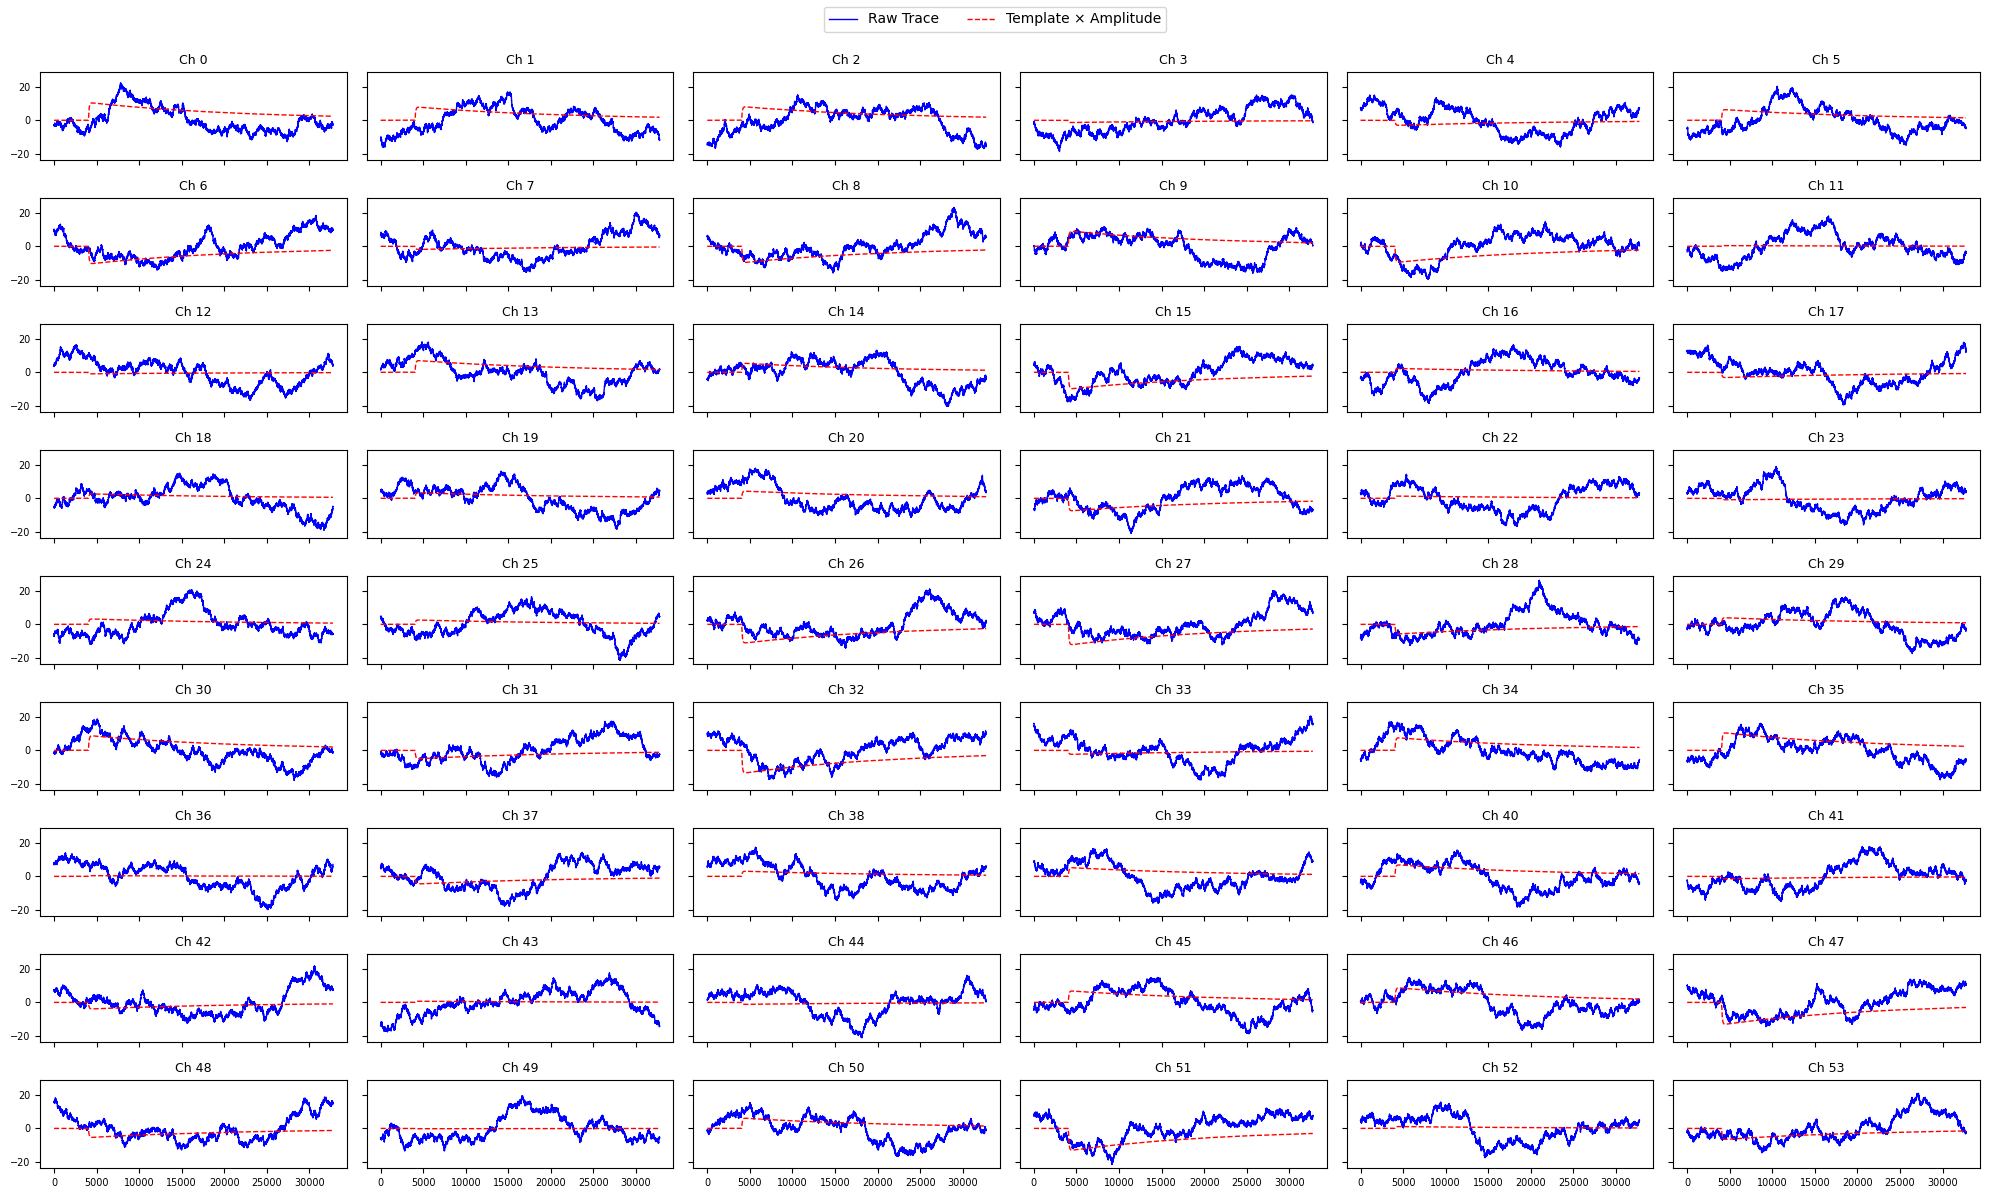

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from trace_IO import load_traces_from_zstd
from OF_trigger import *  # assumes `trigger` and `template` are available

sampling_frequency = 3906250


template = np.load("../templates/template_K_alpha_no_baseline.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")
trace_path = "/ceph/dwong/trigger_samples/traces_energy_0.zst"
# Parameters

# Initialize Optimum Filter
trigger = OFtrigger(template, noise_psd, sampling_frequency)
# --- Load brownian noise traces ---
trace_file = "/ceph/dwong/trigger_samples/noise_traces/brownian_noise_traces.zst"
n_sets = 100  # Load just one (shape will be (1, 54, 32768))
trace_sets = load_traces_from_zstd(trace_file, n_traces=n_sets)
trace_set = trace_sets[0]  # Shape: (54, 32768)

# --- Compute OF amplitudes ---
of_amplitudes = []
for ch in range(54):
    of_val, _ = trigger.fit(trace_set[ch])
    of_amplitudes.append(of_val)
of_amplitudes = np.array(of_amplitudes)

# --- Get the OF template (must match trace length) ---

# --- Plotting function ---
def plot_trace_set_with_of(trace_set, amplitudes, template):
    """
    Plot all 54 channels of a single trace set with overlaid scaled OF template.
    """
    assert trace_set.shape[0] == 54, "Expected 54 channels"
    assert len(amplitudes) == 54, "Expected 54 amplitudes"
    assert trace_set.shape[1] == len(template), "Template length mismatch with trace length"

    fig, axs = plt.subplots(9, 6, figsize=(20, 12), sharex=True, sharey=True)
    axs = axs.flatten()

    for ch in range(54):
        trace = trace_set[ch]
        amp = amplitudes[ch]
        model = template * amp

        axs[ch].plot(trace, label='Raw Trace', color='blue', linewidth=1)
        axs[ch].plot(model, label='Template × Amplitude', color='red', linestyle='--', linewidth=1)
        axs[ch].set_title(f'Ch {ch}', fontsize=9)
        axs[ch].tick_params(labelsize=7)

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# --- Plot ---
plot_trace_set_with_of(trace_set, of_amplitudes, template)


In [5]:
from numpy.fft import rfft, fft, ifft, fftfreq, rfftfreq
import numpy as np

def calculate_psd(traces, sampling_frequency=1.0):
    """Return the PSD of an n-dimensional array, assuming that we want the PSD of the last axis.
    Originally taken from https://github.com/spice-herald/QETpy/blob/master/qetpy/core/_noise.py
    
    Parameters
    ----------
    traces : array_like
        Array to calculate PSD of.
    sampling_frequency : float, optional
        Sample rate of the data being taken, assumed to be in units of Hz.
            
    Returns
    -------
    f : ndarray
        Array of sample frequencies
    psd : ndarray
        Power spectral density of traces. If traces are in units of A, then the PSD is in units of A^2/Hz.
        One can plot the psd with
            plt.loglog(f,psd)
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('PSD (A$^2$/Hz)')
            plt.show()
        
    """
    
    # calculate normalization for correct units
    norm = sampling_frequency * traces.shape[-1]

    # if folded_over = True, we calculate the Fourier Transform for only the positive frequencies
    if len(traces.shape)==1:
        psd = (np.abs(rfft(traces))**2.0)/norm
    else:
        psd = np.mean(np.abs(rfft(traces))**2.0, axis=0)/norm

    # multiply the necessary frequencies by two (zeroth frequency should be the same, as
    # should the last frequency when x.shape[-1] is odd)
    psd[1:traces.shape[-1]//2+1 - (traces.shape[-1]+1)%2] *= 2.0
    f = rfftfreq(traces.shape[-1], d=1.0/sampling_frequency)

    return f, psd

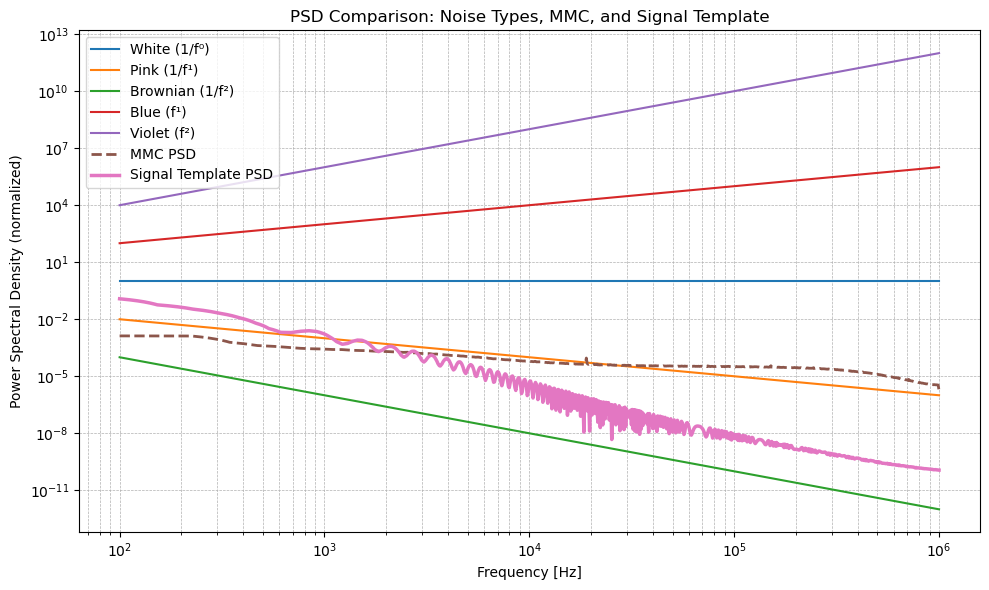

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from numpy.fft import rfft, rfftfreq
import os

# Your PSD function
def calculate_psd(traces, sampling_frequency=1.0):
    norm = sampling_frequency * traces.shape[-1]
    if len(traces.shape) == 1:
        psd = (np.abs(rfft(traces)) ** 2.0) / norm
    else:
        psd = np.mean(np.abs(rfft(traces)) ** 2.0, axis=0) / norm

    psd[1:traces.shape[-1]//2 + 1 - (traces.shape[-1] + 1) % 2] *= 2.0
    f = rfftfreq(traces.shape[-1], d=1.0/sampling_frequency)
    return f, psd

# Frequency axis for consistent comparison
frequencies = np.logspace(2, 6, 1000)  # 1.25 Hz to 10,000 Hz

# Define noise color PSDs
psd_white = np.ones_like(frequencies)
psd_pink = 1 / frequencies
psd_brownian = 1 / frequencies**2
psd_blue = frequencies
psd_violet = frequencies**2

# Load MMC PSD
mmc_path = "../templates/noise_psd_from_MMC.npy"
if os.path.exists(mmc_path):
    mmc_psd = np.load(mmc_path)
    if len(mmc_psd) != len(frequencies):
        original_freq = np.linspace(frequencies[0], frequencies[-1], len(mmc_psd))
        mmc_psd = interp1d(original_freq, mmc_psd, bounds_error=False, fill_value="extrapolate")(frequencies)
else:
    raise FileNotFoundError(f"MMC PSD not found at: {mmc_path}")

# Load signal template and compute PSD
template_path = "../templates/template_K_alpha_tight.npy"
if os.path.exists(template_path):
    signal = np.load(template_path)
    sampling_rate = 2500000.0
    signal_freqs, signal_psd = calculate_psd(signal, sampling_frequency=sampling_rate)

    # Normalize signal PSD and interpolate to match plotting frequencies
    signal_psd /= np.max(signal_psd)  # normalize for visibility
    signal_interp = interp1d(signal_freqs[1:], signal_psd[1:], bounds_error=False, fill_value=0)
    signal_psd_resampled = signal_interp(frequencies)
else:
    raise FileNotFoundError(f"Signal template not found at: {template_path}")

# Plot all
plt.figure(figsize=(10, 6))
plt.loglog(frequencies, psd_white, label='White (1/f⁰)')
plt.loglog(frequencies, psd_pink, label='Pink (1/f¹)')
plt.loglog(frequencies, psd_brownian, label='Brownian (1/f²)')
plt.loglog(frequencies, psd_blue, label='Blue (f¹)')
plt.loglog(frequencies, psd_violet, label='Violet (f²)')
plt.loglog(frequencies, mmc_psd, label='MMC PSD', linestyle='--', linewidth=2.0)
plt.loglog(frequencies, signal_psd_resampled, label='Signal Template PSD', linewidth=2.5)

plt.title("PSD Comparison: Noise Types, MMC, and Signal Template")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power Spectral Density (normalized)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import os

# List of noise types to check
noise_types = ['white', 'pink', 'brownian', 'blue', 'violet', 'from_MMC']
psd_dir = "../templates/"

print("📏 Checking PSD array lengths:")
for noise in noise_types:
    filename = f"noise_psd_{noise}.npy"

    path = os.path.join(psd_dir, filename)

    if os.path.exists(path):
        psd = np.load(path)
        print(f"{noise.capitalize():<10}: Length = {len(psd)}")
    else:
        print(f"{noise.capitalize():<10}: ❌ File not found at {path}")


📏 Checking PSD array lengths:
White     : Length = 16385
Pink      : Length = 16385
Brownian  : Length = 16385
Blue      : Length = 16385
Violet    : Length = 16385
From_mmc  : Length = 16385


In [9]:
from OF_trigger import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from trace_IO import load_traces_from_zstd
import os

# --- Configuration ---
noise_colors = ['white', 'pink', 'brownian', 'blue', 'violet', 'from_MMC']
base_path = "/ceph/dwong/trigger_samples/noise_traces"
mmc_trace_path = "/ceph/dwong/trigger_samples/NR/traces_energy_0.zst"
sampling_frequency = 3.90625e6
template = np.load("../templates/template_K_alpha_no_baseline.npy")
trace_per_set = 54

# --- Data Containers ---
all_amplitudes = {}
all_chisq = {}

# --- Process Each Noise Type ---
for color in noise_colors:
    print(f"\n--- Processing {color} noise ---")

    # Set trace source and number of sets
    if color == "from_MMC":
        trace_path = mmc_trace_path
        n_sets = 100
    else:
        trace_path = f"{base_path}/{color}_noise_traces.zst"
        n_sets = 100

    # Load traces
    loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

    # Load corresponding PSD
    psd_path = f"../templates/noise_psd_{color}.npy"
    if not os.path.exists(psd_path):
        raise FileNotFoundError(f"Missing PSD file for {color} noise at: {psd_path}")
    noise_psd = np.load(psd_path)

    # Resample PSD if needed
    expected_len = len(template) // 2 + 1
    if len(noise_psd) != expected_len:
        freqs = np.fft.rfftfreq(len(template), d=1 / sampling_frequency)
        original_freq = np.linspace(freqs[0], freqs[-1], len(noise_psd))
        noise_psd = interp1d(original_freq, noise_psd, bounds_error=False, fill_value="extrapolate")(freqs)

    # Create Optimum Filter with corresponding PSD
    trigger = OFtrigger(template, noise_psd, sampling_frequency)

    # Fit traces
    amplitudes = []
    chisqs = []

    for i in range(n_sets):
        for trace in loaded_traces[i]:
            of_val, chisq = trigger.fit(trace)
            amplitudes.append(of_val)
            chisqs.append(chisq)

    amplitudes = np.array(amplitudes)
    chisqs = np.array(chisqs)

    # Save results
    all_amplitudes[color] = amplitudes
    all_chisq[color] = chisqs

    # Print summary statistics
    print("OF Amplitude:")
    print(f"  Mean: {np.mean(amplitudes): .4f}")
    print(f"  Std:  {np.std(amplitudes): .4f}")
    print(f"  Min:  {np.min(amplitudes): .4f}")
    print(f"  Max:  {np.max(amplitudes): .4f}")



--- Processing white noise ---
OF Amplitude:
  Mean: -0.0019
  Std:   0.1178
  Min:  -0.3489
  Max:   0.3590

--- Processing pink noise ---
OF Amplitude:
  Mean:  0.0024
  Std:   2.5090
  Min:  -8.9976
  Max:   8.9004

--- Processing brownian noise ---
OF Amplitude:
  Mean:  0.0005
  Std:   0.4940
  Min:  -1.7999
  Max:   1.6429

--- Processing blue noise ---
OF Amplitude:
  Mean: -0.0000
  Std:   0.0016
  Min:  -0.0043
  Max:   0.0039

--- Processing violet noise ---
OF Amplitude:
  Mean:  0.0000
  Std:   0.0000
  Min:  -0.0001
  Max:   0.0001

--- Processing from_MMC noise ---
OF Amplitude:
  Mean: -0.0056
  Std:   0.7649
  Min:  -2.5483
  Max:   2.5055
